# Lab Quiz

- Rename this file as StudentName_StudentID.ipynb, where StudentName is your full name and StudentID is your matriculation number. 
- Write your code in the code cells or boxes. Do not create extra cells for Problem 1,2 and 3. You can create extra cells for Problem 4 if need be.
- Below each Comment of a Problem, write your answer to that Comment 

### Preparation

What do you need to prepare/import? Insert your code below.  

In [1]:
# Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
dimensionData = pd.read_csv('train.csv')
dimensionData.head()

,Height,Weight,Length,Diameter
0,0.095,0.5140,0.455,0.365
1,0.090,0.2255,0.350,0.265
2,0.135,0.6770,0.530,0.420
3,0.125,0.5160,0.440,0.365
4,0.080,0.2050,0.330,0.255


---

## Problems

### Problem 1a

Print the overall statistical description.

In [3]:
dimensionData.describe()

,Height,Weight,Length,Diameter
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.139289,0.824239,0.522496,0.406785
std,0.042147,0.491469,0.120732,0.099706
min,0.000000,0.002000,0.075000,0.055000
25%,0.115000,0.438375,0.450000,0.345000
50%,0.140000,0.795000,0.540000,0.420000
75%,0.165000,1.148000,0.615000,0.480000
max,1.130000,2.825500,0.815000,0.650000


Plot standard statistical distributions for each variable.

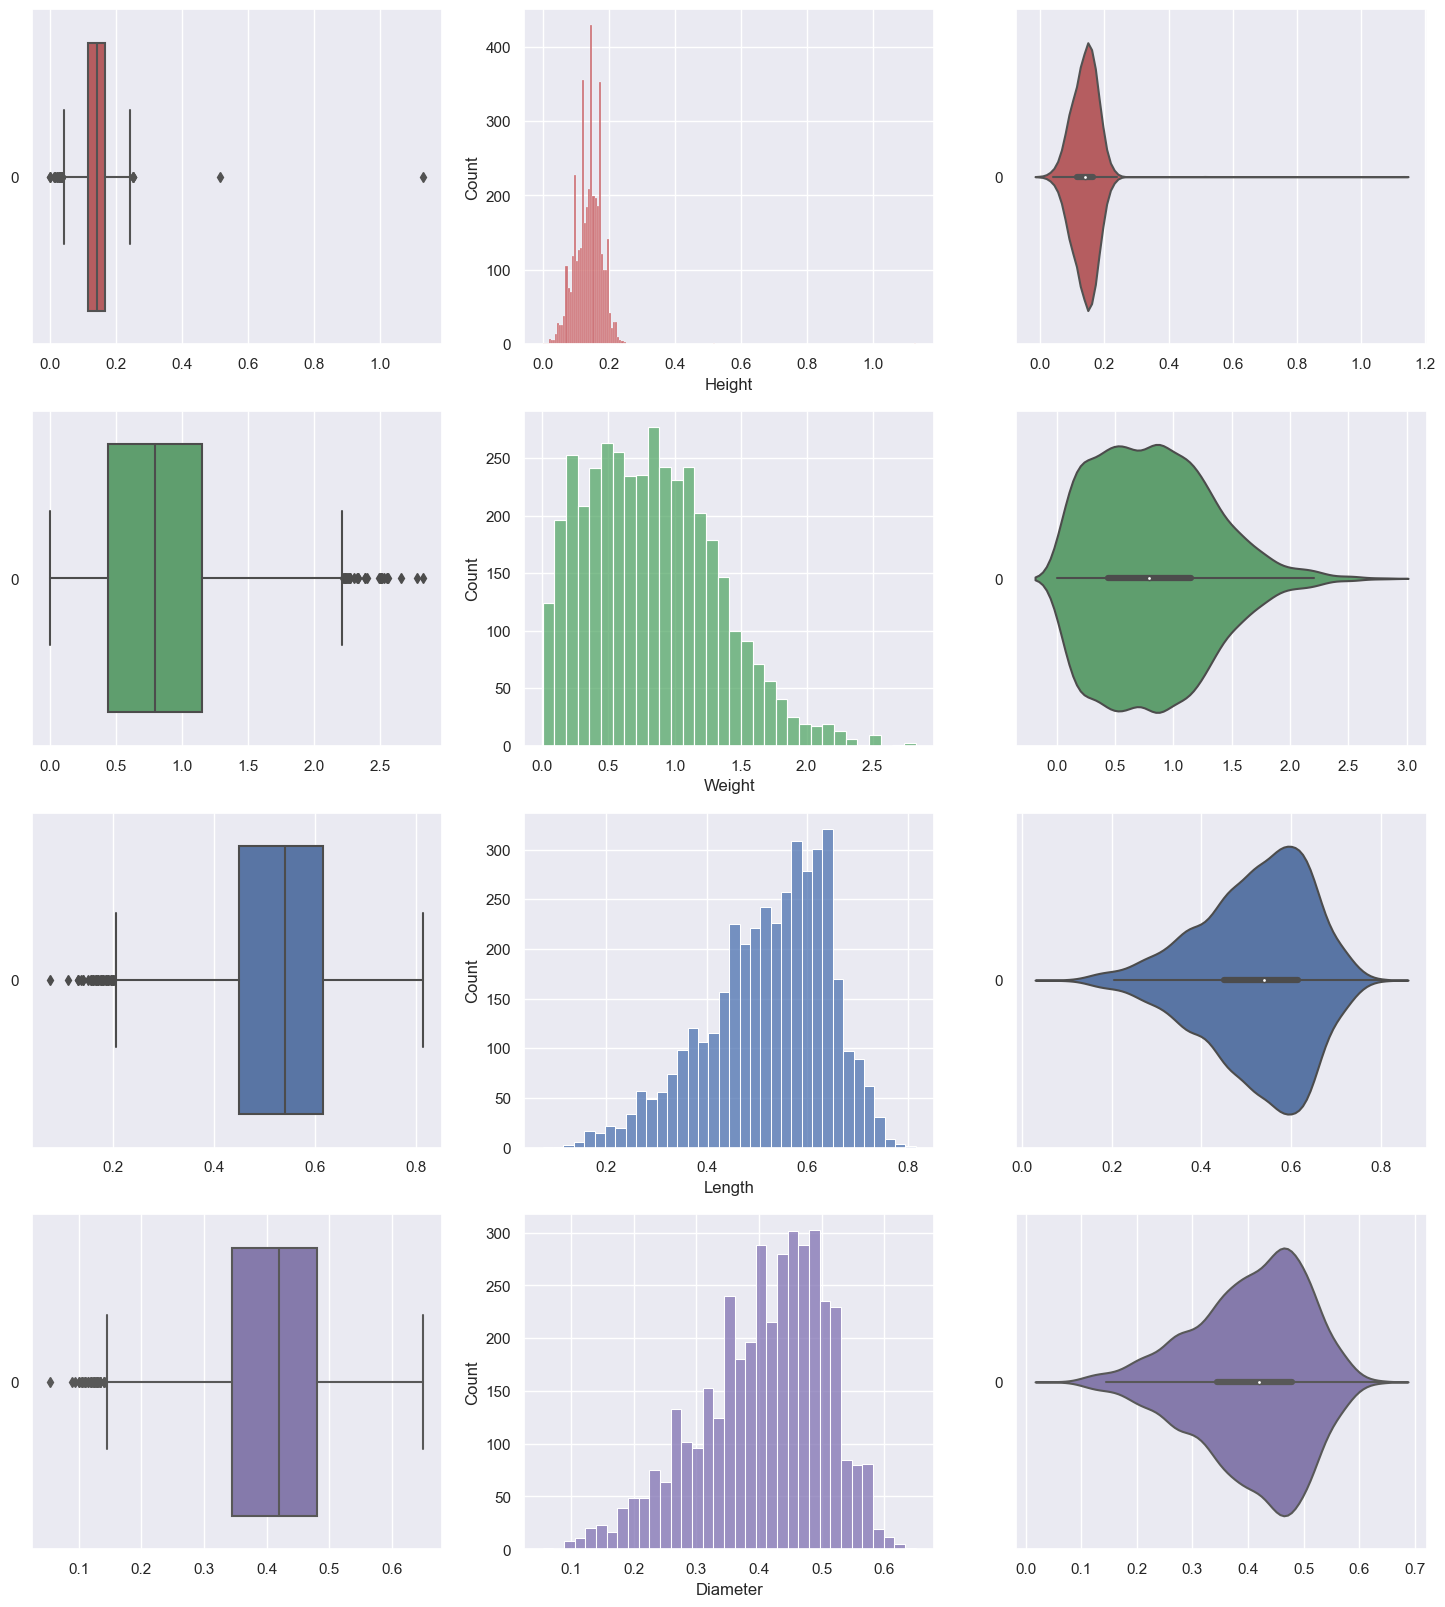

In [4]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in dimensionData:
    sb.boxplot(data=dimensionData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=dimensionData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=dimensionData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

Comment : Which variable has most “Normal” looking distribution? 

Answer: Height has the most "Normal" looking distribution
 

Comment : Which variable has most number of outliers?

Answer: Weight has the most number of outliers.

### Problem 1b

Print the mutual correlation amongst all the variables using a correlation heatmap. 

            Height    Weight    Length  Diameter
Height    1.000000  0.817084  0.825679  0.831828
Weight    0.817084  1.000000  0.925284  0.925550
Length    0.825679  0.925284  1.000000  0.987005
Diameter  0.831828  0.925550  0.987005  1.000000


<Axes: >

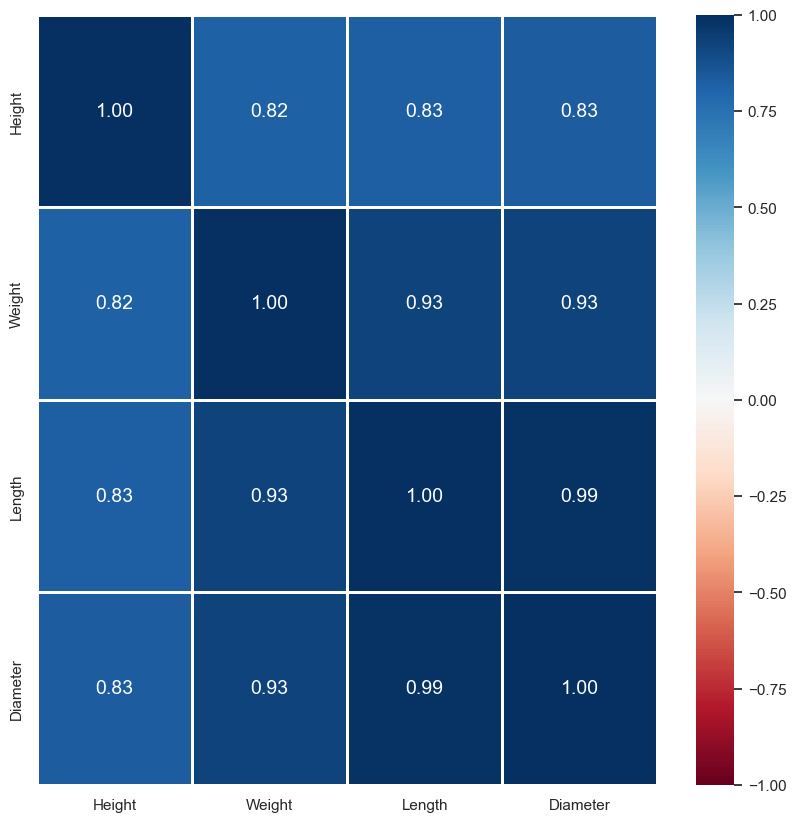

In [5]:
# Correlation Matrix
print(dimensionData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(dimensionData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

Comment : Which variable has the highest absolute correlation? Is such a strong correlation helpful?

Answer: Length has the highest absolute correlation with Diameter. A strong correlation is useful in predicting Diameter.

### Problem 1c

Visualize the relationship using mutual jointplots.

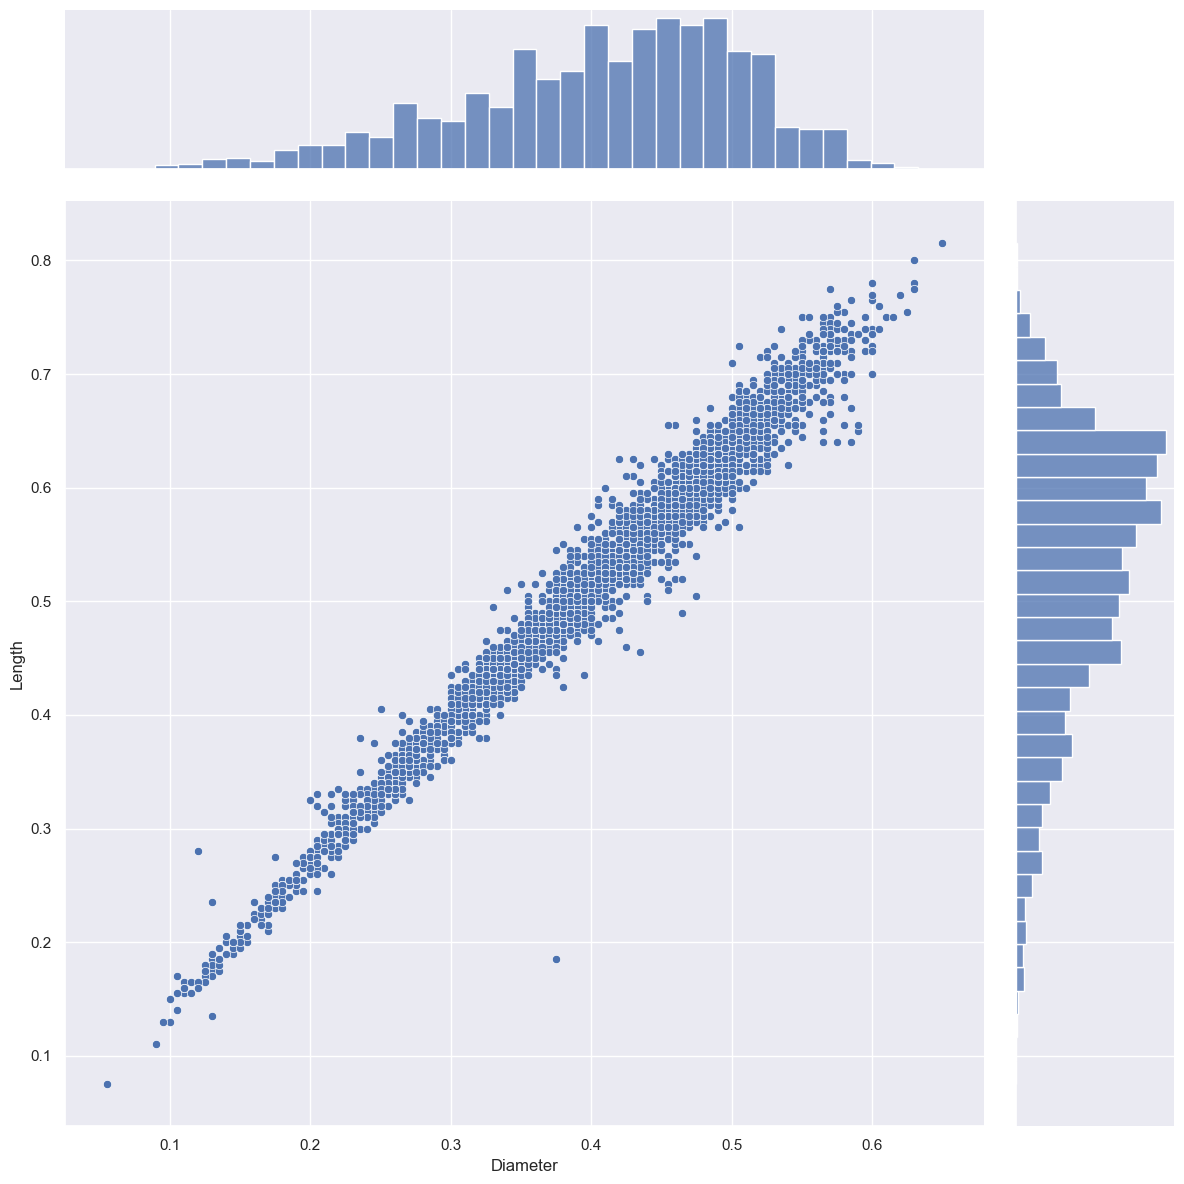

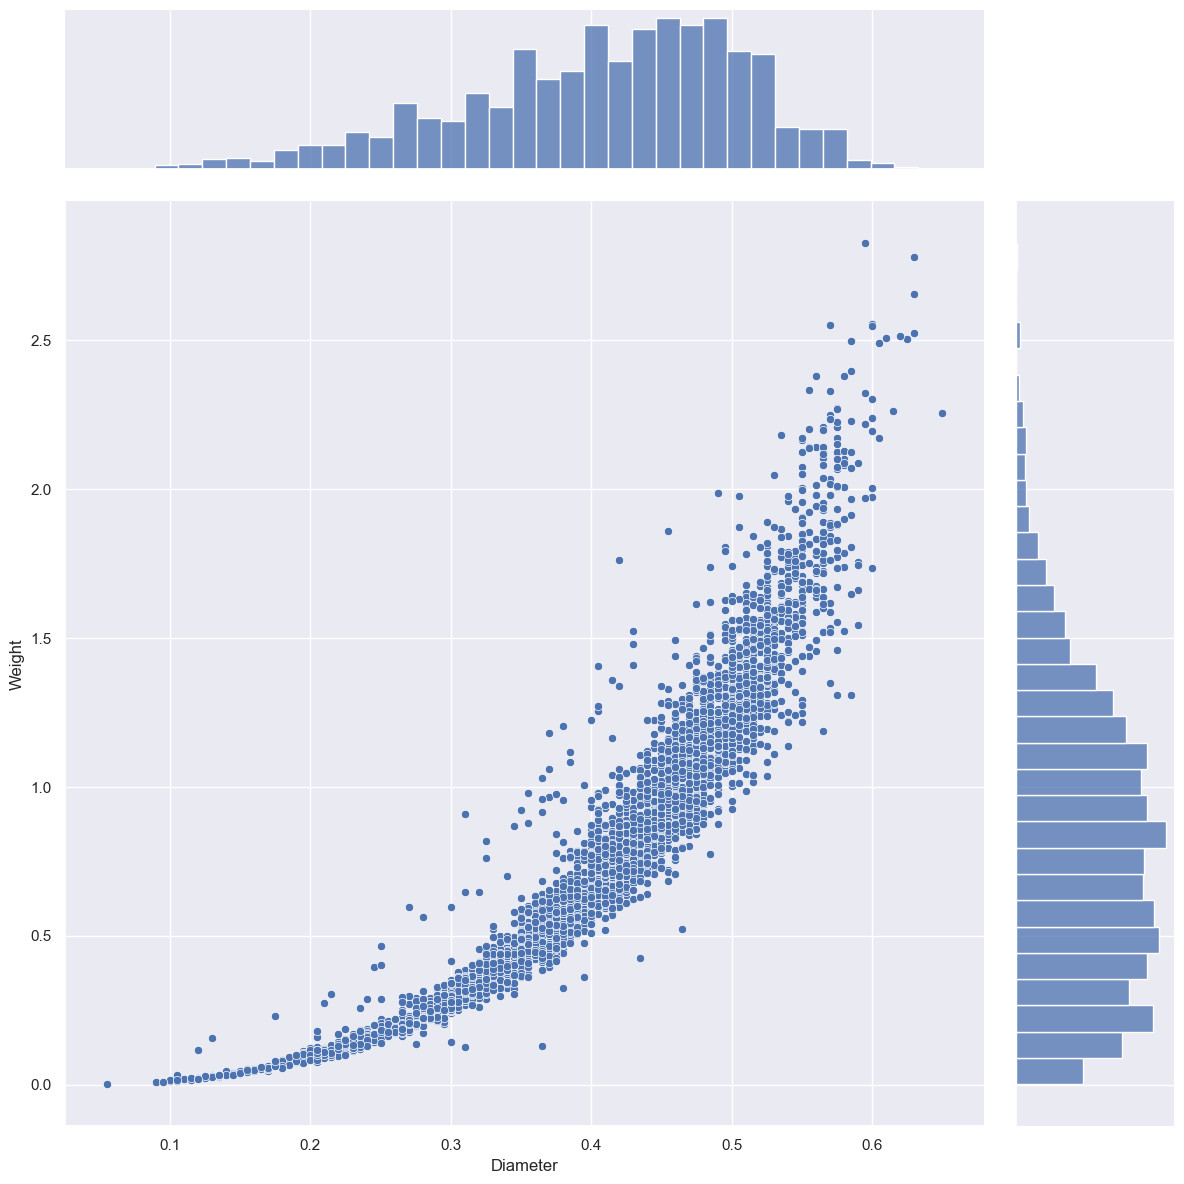

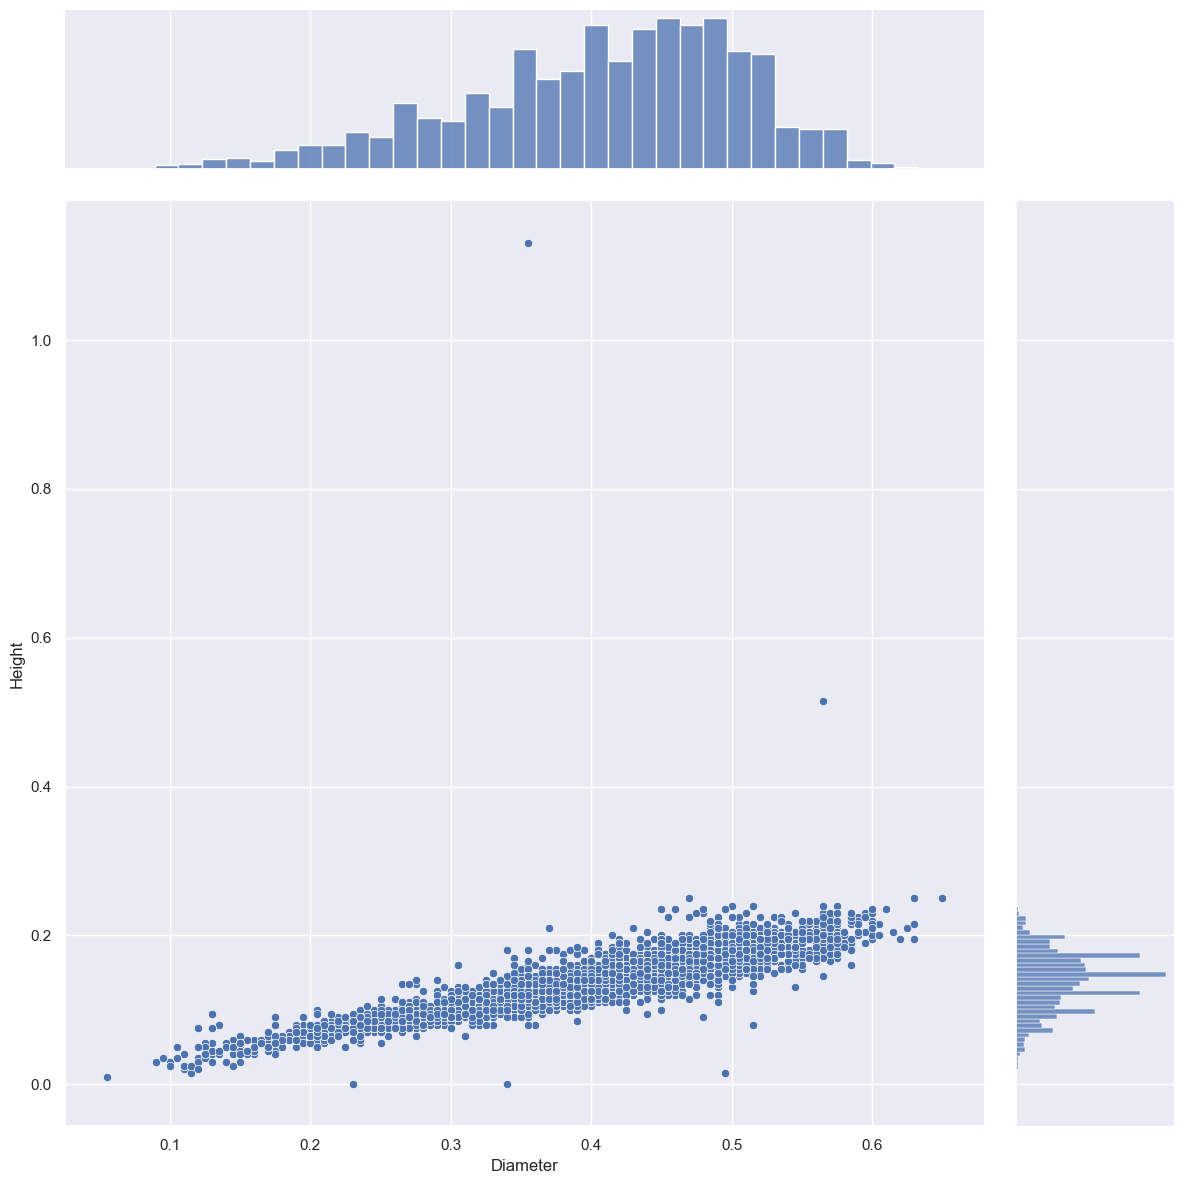

In [6]:
dimensionDataDiameter = pd.DataFrame(dimensionData['Diameter'])
dimensionDataLength = pd.DataFrame(dimensionData['Length'])
dimensionDataWeight = pd.DataFrame(dimensionData['Weight'])
dimensionDataHeight = pd.DataFrame(dimensionData['Height'])

trainDF = pd.concat([dimensionDataDiameter, dimensionDataLength], axis = 1).reindex(dimensionDataDiameter.index)
sb.jointplot(data=trainDF, x='Diameter', y='Length', height = 12)

trainDF = pd.concat([dimensionDataDiameter, dimensionDataWeight], axis = 1).reindex(dimensionDataDiameter.index)
sb.jointplot(data=trainDF, x='Diameter', y='Weight', height = 12)

trainDF = pd.concat([dimensionDataDiameter, dimensionDataHeight], axis = 1).reindex(dimensionDataDiameter.index)
sb.jointplot(data=trainDF, x='Diameter', y='Height', height = 12)


Visualize using an overall pairplot.

C:\Users\SNAKE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


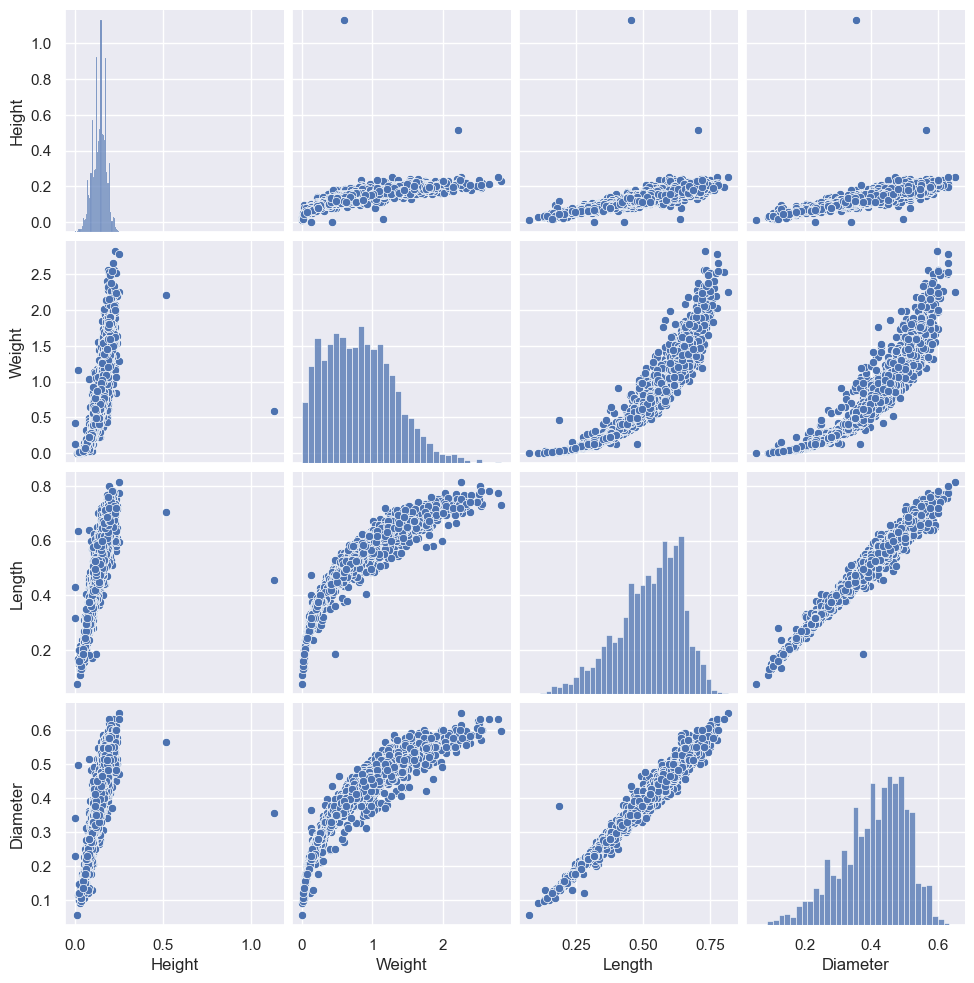

In [7]:
# Draw pairs of variables against one another
sb.pairplot(data = dimensionData)

Comment : Which of the variables has the strongest linear? Is it useful in prediction?

Answer: Length has the strongest linear relation with Diameter. It is useful in prediction.

### Problem 2a

Partition the dataset randomly into Train and Test datasets.

In [46]:
# Extract Response and Predictors
predictors = ['Length', 'Weight', 'Height']

y = pd.DataFrame(dimensionData['Diameter'])
X = pd.DataFrame(dimensionData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3000, 3) (3000, 1)
Test Set  : (1000, 3) (1000, 1)


On the Train set, fit three uni-variate Linear Regression models for the response against each of the three other variables. For each such linear model, print the coefficients of the model you fit, and plot the regression line on a scatterplot. 

Intercept of Regression 	: b =  [-0.01809071]
Coefficients of Regression 	: a =  [[0.81326009]]

Intercept 	: b =  [-0.01809071]
Coefficients 	: a =  [[0.81326009]]


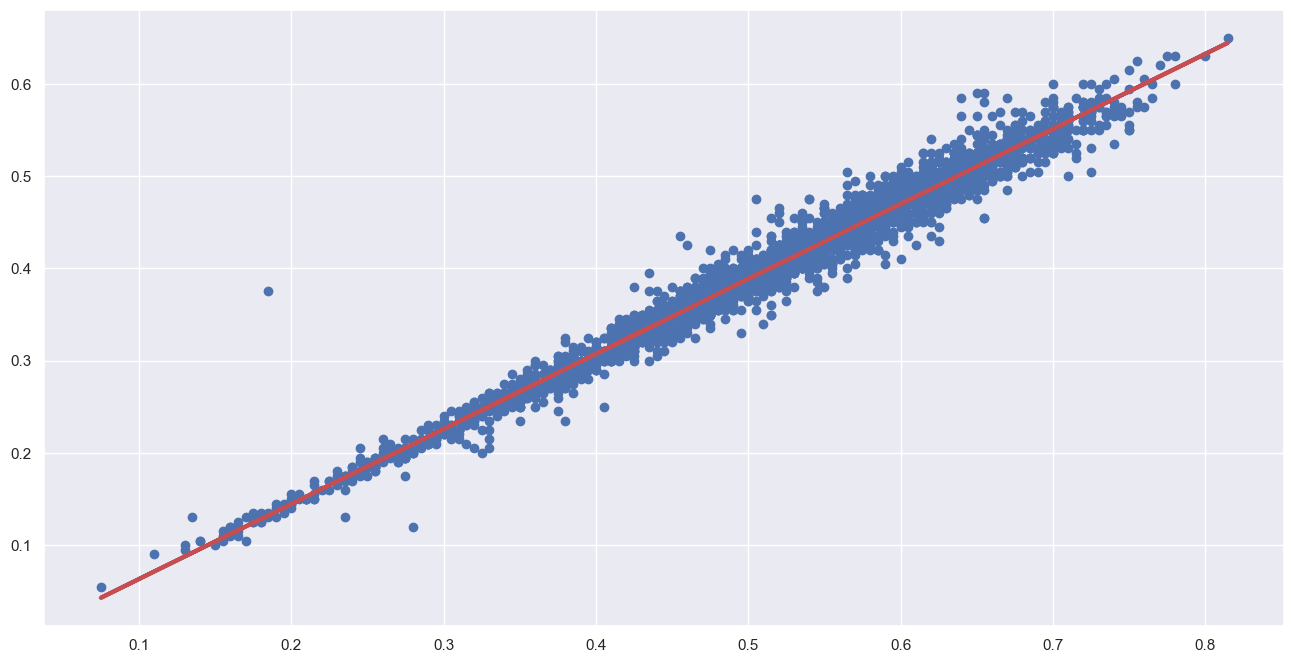

In [47]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Length']], y_train)       # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train[['Length']]
regline_y = linreg.intercept_ + linreg.coef_ * X_train[['Length']]

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train[['Length']], y_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()


Intercept of Regression 	: b =  [0.25268969]
Coefficients of Regression 	: a =  [[0.18699833]]

Intercept 	: b =  [0.25268969]
Coefficients 	: a =  [[0.18699833]]


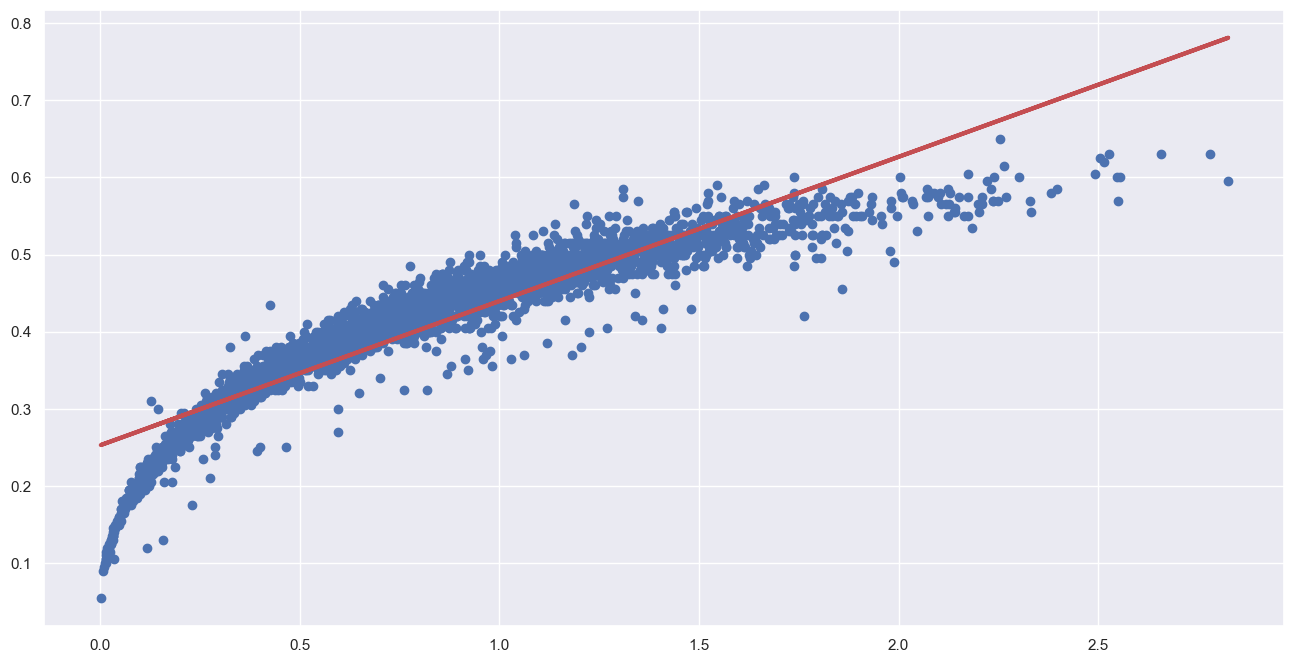

In [48]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Weight']], y_train)       # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train[['Weight']]
regline_y = linreg.intercept_ + linreg.coef_ * X_train[['Weight']]

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train[['Weight']], y_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

Intercept of Regression 	: b =  [0.14650537]
Coefficients of Regression 	: a =  [[1.8680077]]

Intercept 	: b =  [0.14650537]
Coefficients 	: a =  [[1.8680077]]


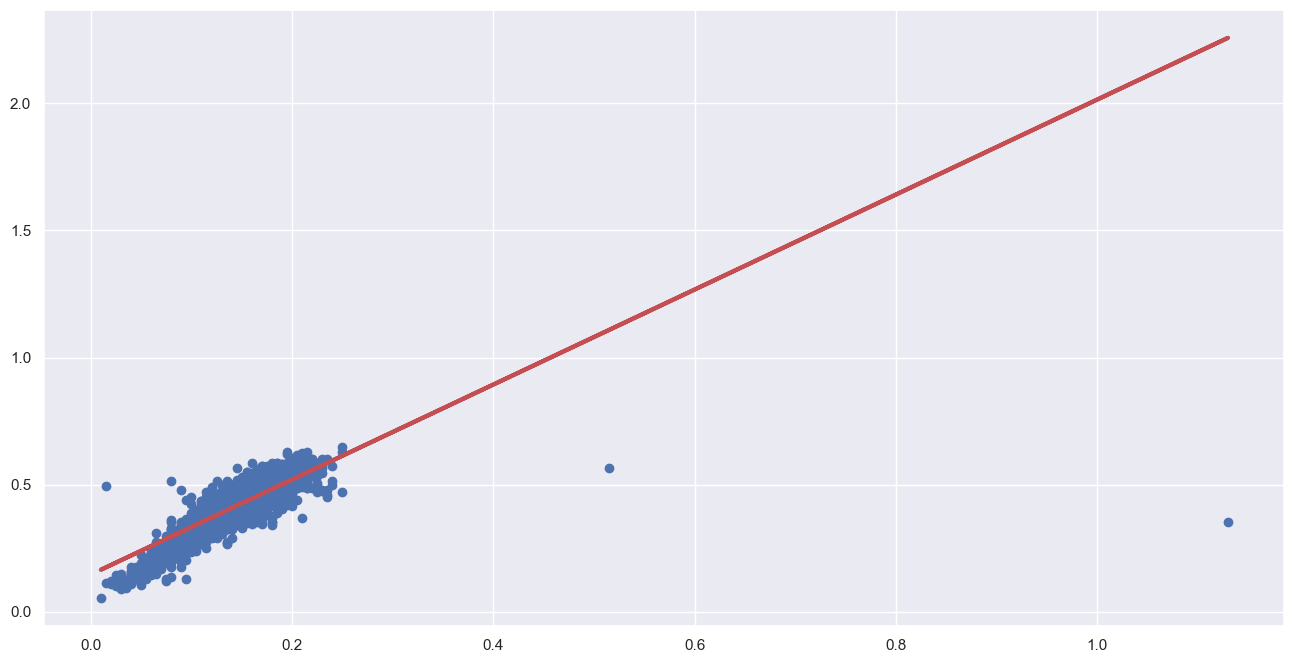

In [49]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Height']], y_train)       # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train[['Height']]
regline_y = linreg.intercept_ + linreg.coef_ * X_train[['Height']]

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train[['Height']], y_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

### Problem 2b

Predict the response using each of the three models on both Train and Test datasets. Plot the actual values of the response against the predicted values of the response in each case. Print the Mean Squared Errors and R^2 values in each case.

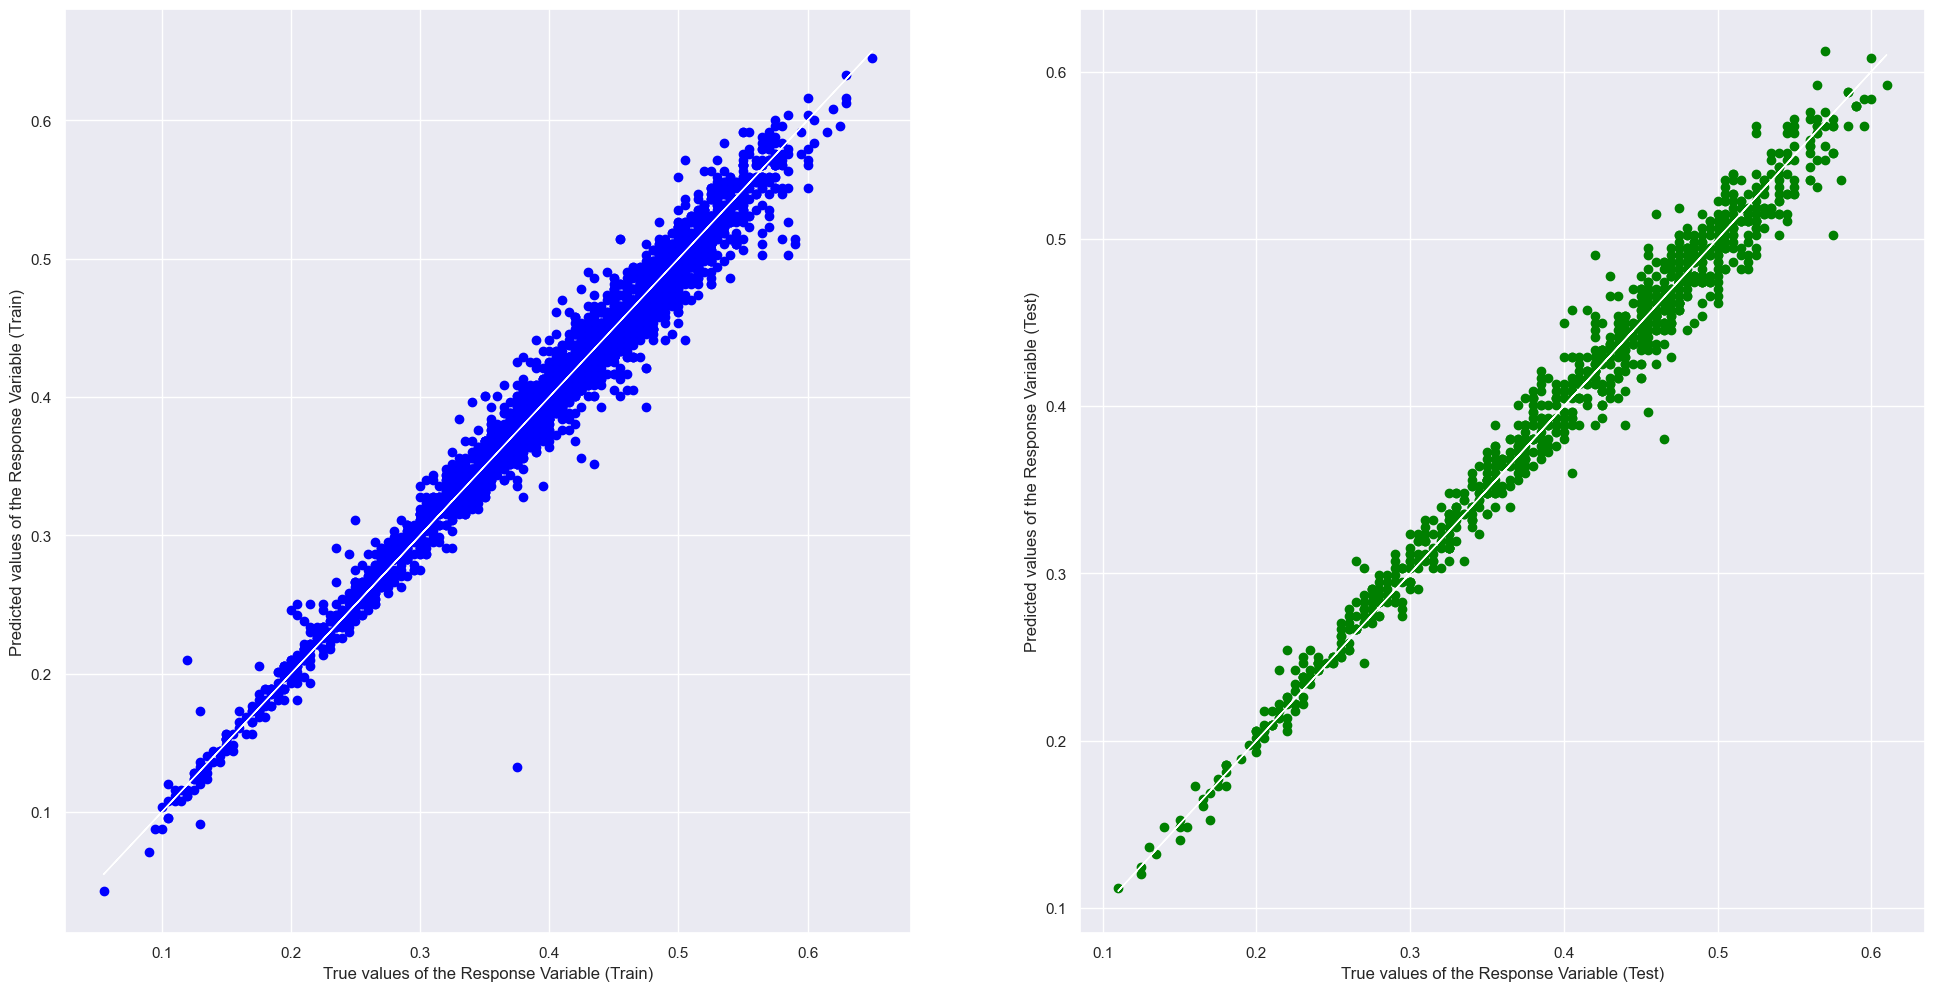

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9730845086209213
Mean Squared Error (MSE) 	: 0.00026695311885924726

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9774111498642591
Mean Squared Error (MSE) 	: 0.00022589719749998958



In [51]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Length']], y_train)        # train the linear regression model\

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train[['Length']])
y_test_pred = linreg.predict(X_test[['Length']])

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train[['Length']], y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test[['Length']], y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

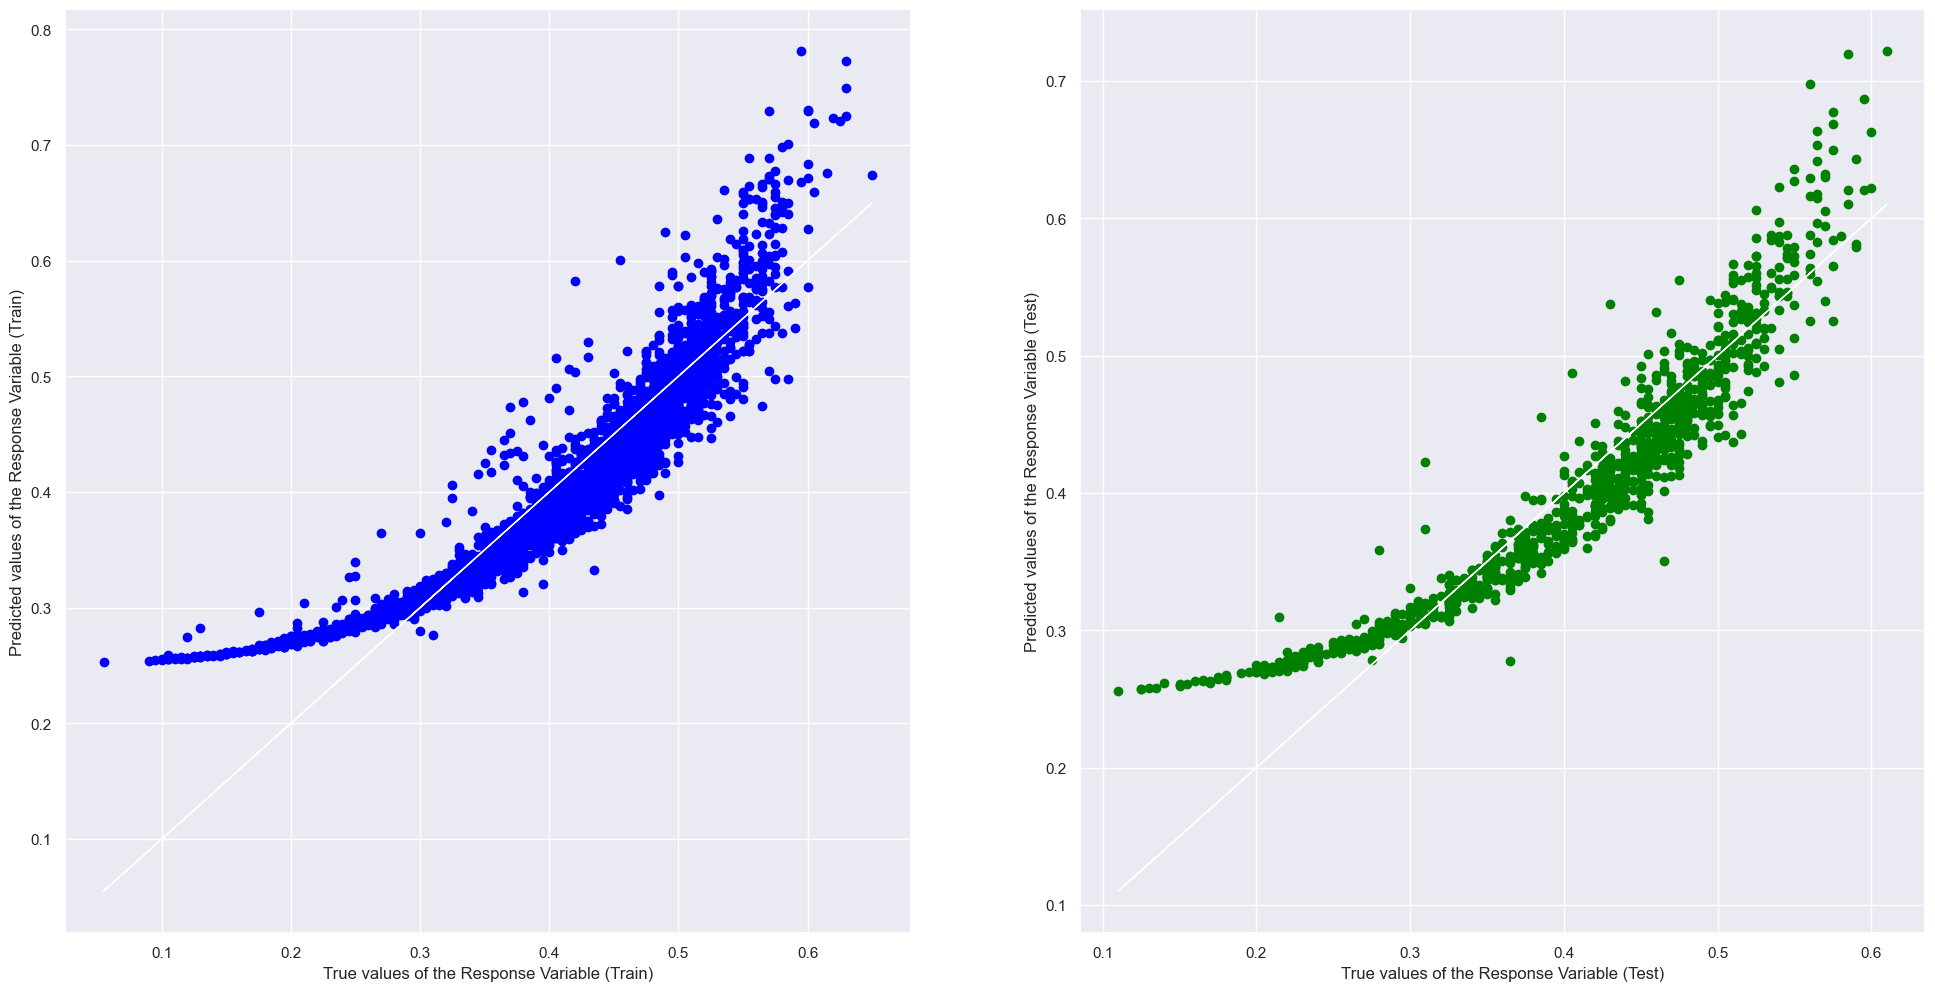

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8506215777233261
Mean Squared Error (MSE) 	: 0.001481564469895878

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8744986782599491
Mean Squared Error (MSE) 	: 0.0012550615322718458



In [53]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Weight']], y_train)        # train the linear regression model\

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train[['Weight']])
y_test_pred = linreg.predict(X_test[['Weight']])

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train[['Weight']], y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test[['Weight']], y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

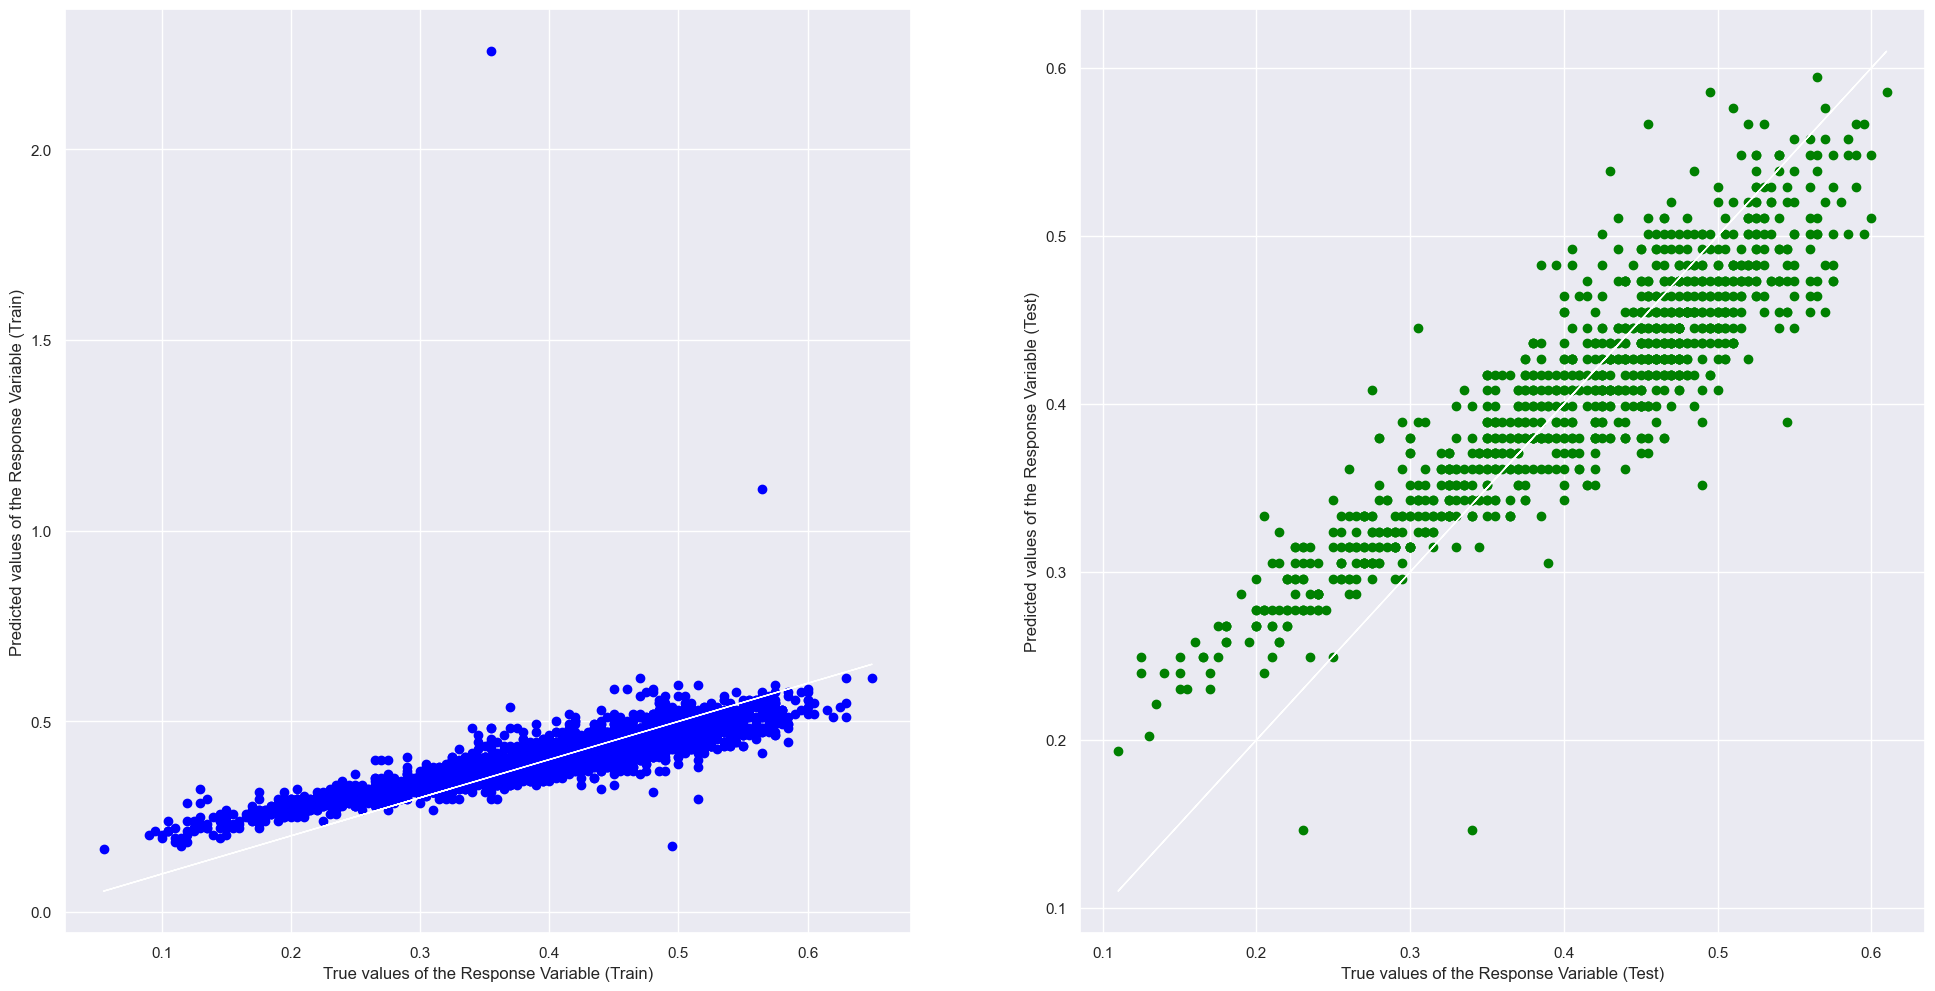

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6556201347194626
Mean Squared Error (MSE) 	: 0.003415627001349355

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.792903016215937
Mean Squared Error (MSE) 	: 0.002071049565001963



In [54]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train[['Height']], y_train)        # train the linear regression model\

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train[['Height']])
y_test_pred = linreg.predict(X_test[['Height']])

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train[['Height']], y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test[['Height']], y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Problem 2c

Comment : Which of the three uni-variate linear models is the best in prediction? Briefly justify.

Answer: Length Model is the best. R^2 is closer to 1 for train and test.

### Problem 3a

Partition the dataset randomly into Train and Test datasets. On the Train set, fit a single multi-variate Linear Regression model for the response against all of the three other variables. 

In [26]:
# Extract Response and Predictors
y = pd.DataFrame(dimensionData["Diameter"])
X = pd.DataFrame(dimensionData[["Length", "Weight", "Height"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()


Intercept of Regression 	: b =  [-0.00269512]
Coefficients of Regression 	: a =  [[0.71254579 0.01218522 0.19590671]]

  Predictors  Coefficients
0     Length      0.712546
1     Weight      0.012185
2     Height      0.195907



### Problem 3b

Predict the response using this model on both Train and Test datasets. Print the Mean Squared Error and R^2 values.

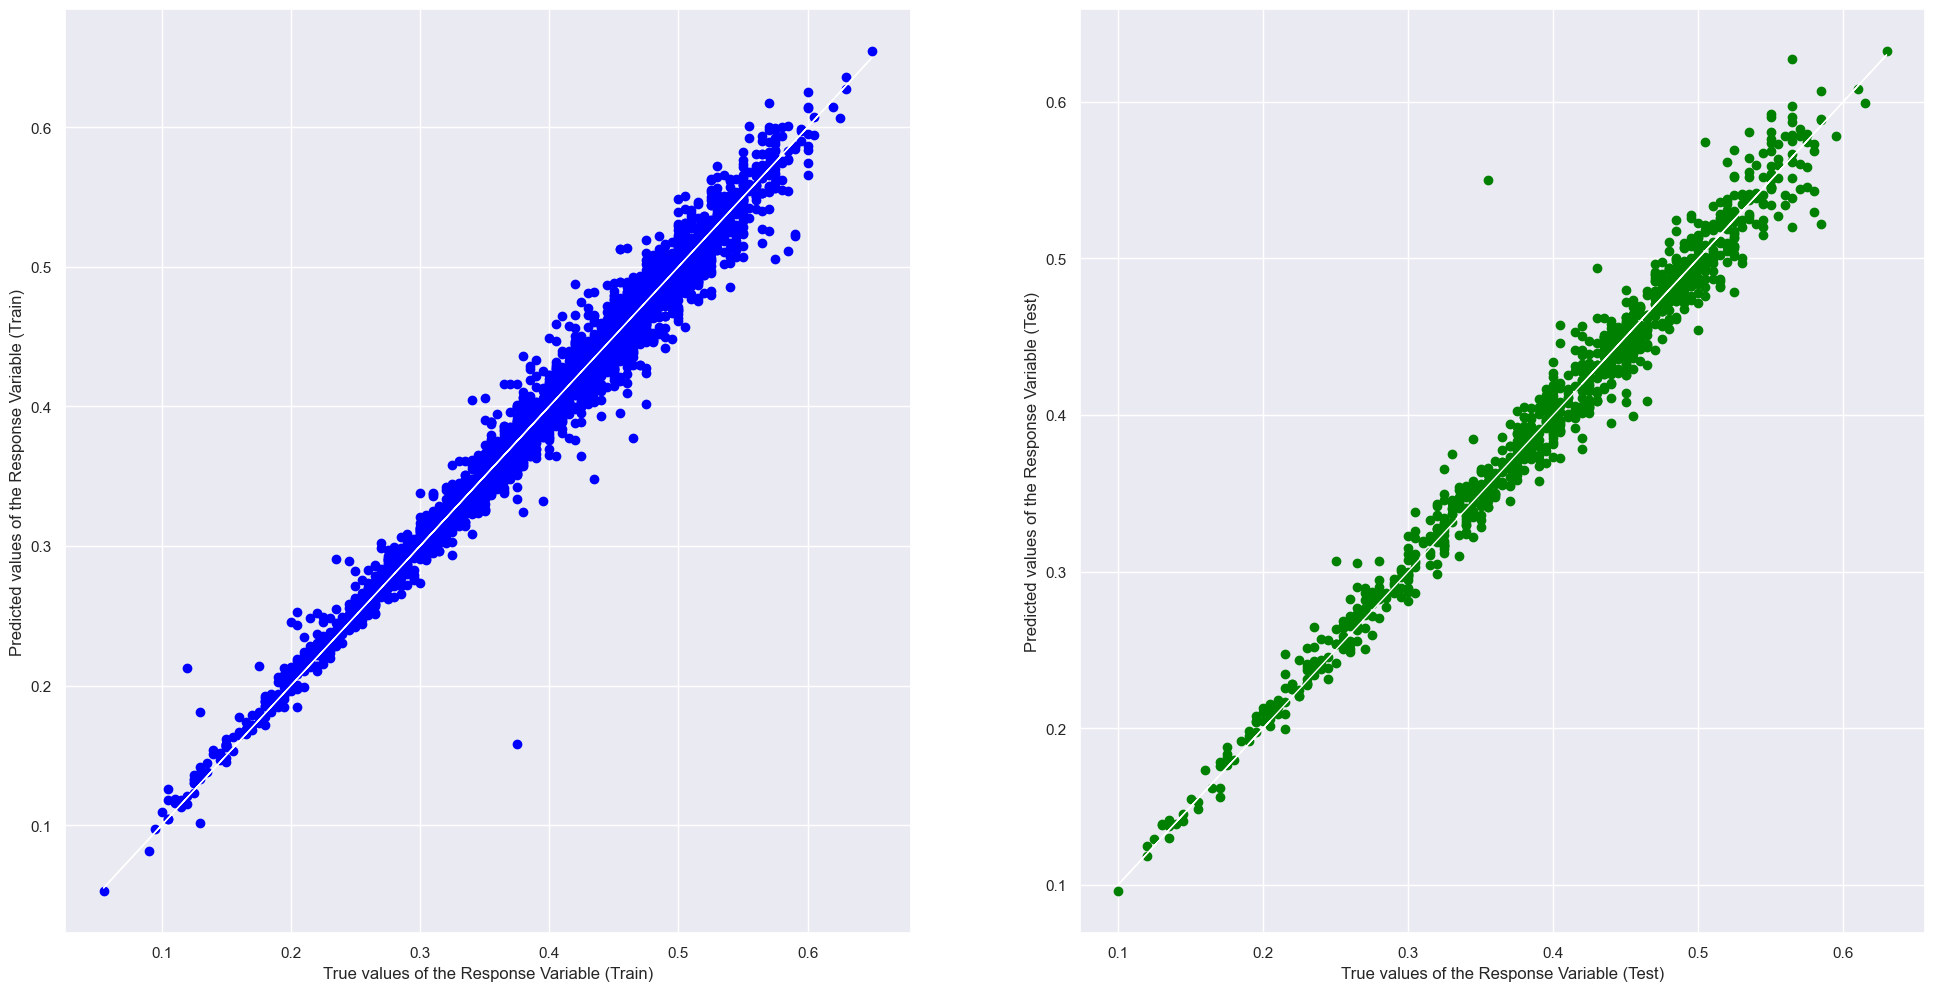

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9753113899961311
Mean Squared Error (MSE) 	: 0.00024223640606061843

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9749427120110987
Mean Squared Error (MSE) 	: 0.0002584947189351442



In [27]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Problem 4

Propose two methods to improve the linear model even further and implement the code for each method proposed.

In [ ]:
# Method 1:

In [ ]:
# Method 2: